<a href="https://colab.research.google.com/github/Sanim27/DeepL_from_scratch/blob/main/LogRegNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install h5py numpy


In [8]:
import h5py
import numpy as np

def load_dataset():
    # Load the training set
    train_dataset = h5py.File('/content/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # your train set labels

    # Load the test set
    test_dataset = h5py.File('/content/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # your test set labels

    classes = np.array(test_dataset["list_classes"][:])  # the list of classes

    # Reshape the labels to match the expected format
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# Load the data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

print("Training set shape:", train_set_x_orig.shape)
print("Training labels shape:", train_set_y.shape)
print("Test set shape:", test_set_x_orig.shape)
print("Test labels shape:", test_set_y.shape)
print("Classes:", classes)


Training set shape: (209, 64, 64, 3)
Training labels shape: (1, 209)
Test set shape: (50, 64, 64, 3)
Test labels shape: (1, 50)
Classes: [b'non-cat' b'cat']


In [10]:
import matplotlib.pyplot as plt

y = 0, it's a 'non-cat' picture.


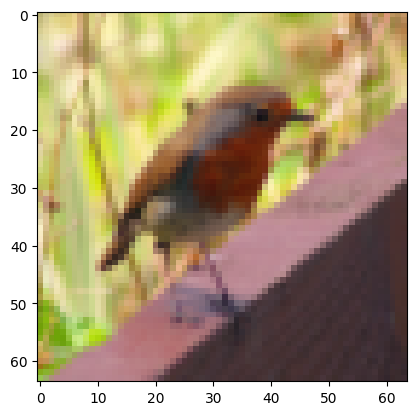

In [11]:
# Example of a picture
index =10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [12]:
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [13]:
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3],train_set_x_orig.shape[0])
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3],test_set_x_orig.shape[0])
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 71 49 38 70]


In [14]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [15]:
import numpy as np

In [16]:
def sigmoid(z):
  return 1 / (1+np.exp(-z))

In [31]:
def initialize_parameters(dim):
  w=np.zeros((dim,1))
  b=0
  return w,b

In [18]:
def propagate(w,b,X,Y):
  m=X.shape[1]
  Z=np.dot(w.T,X)+b
  A=sigmoid(Z)
  cost=np.sum(((-np.log(A))*Y+(-np.log(1-A))*(1-Y)))/m
  cost=np.squeeze(cost)
  dZ=A-Y
  dw=np.dot(X,dZ.T)/m
  db=np.sum(dZ)
  grads={"dw":dw,"db":db}
  return grads,cost

In [33]:
def optimize(w,b,X,Y,number_iterations,learning_rate,print_cost=False):
  costs=[]

  for i in range(number_iterations):
    grads,cost=propagate(w,b,X,Y)
    dw=grads["dw"]
    db=grads["db"]
    w=w-learning_rate*dw
    b=b-learning_rate*db
    if i%100==0:
      costs.append(cost)
    if print_cost and i%100==0:
      print("cost after iteration %i:%f" %(i,cost))

  params={"w":w,"b":b}
  grads={"dw":dw,"db":db}

  return params,grads,costs

In [22]:
def predict(w,b,X):
  m = X.shape[1]
  prediction = np.zeros((1,m))
  w = w.reshape(X.shape[0], 1)

  Z=np.dot(w.T,X)+b
  A=sigmoid(Z)
  prediction=(A>0.5)*1.0
  return prediction

In [26]:
def model(X_train,Y_train,X_test,Y_test,num_iter=2000,learning_rate=0.5,print_cost=False):

  w,b=initialize_parameters(X_train.shape[0])
  params,grads,costs=optimize(w,b,X_train,Y_train,num_iter,learning_rate,print_cost)
  w=params['w']
  b=params['b']
  prediction_train=predict(w,b,X_train)
  prediction_test=predict(w,b,X_test)
  print("train accuracy: {} %".format(100 - np.mean(np.abs(prediction_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(prediction_test - Y_test)) * 100))
  d = {"costs": costs,
         "Y_prediction_test": prediction_test,
         "Y_prediction_train" : prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iter}

  return d

In [34]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iter = 2000, learning_rate = 0.005, print_cost = True)

cost after iteration 0:0.693147
cost after iteration 100:0.755664
cost after iteration 200:0.710104
cost after iteration 300:0.670821
cost after iteration 400:0.635873
cost after iteration 500:0.604838
cost after iteration 600:0.577088
cost after iteration 700:0.551899
cost after iteration 800:0.528662
cost after iteration 900:0.506929
cost after iteration 1000:0.486387
cost after iteration 1100:0.466817
cost after iteration 1200:0.448069
cost after iteration 1300:0.430038
cost after iteration 1400:0.412649
cost after iteration 1500:0.395858
cost after iteration 1600:0.379643
cost after iteration 1700:0.364033
cost after iteration 1800:0.349174
cost after iteration 1900:0.335608
train accuracy: 89.95215311004785 %
test accuracy: 34.0 %


The model has hugely overfit.

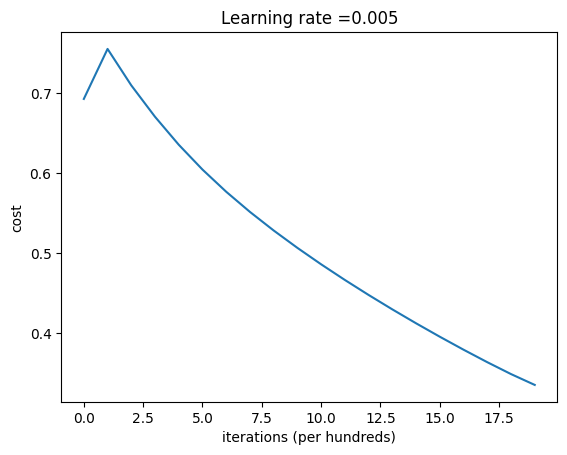

In [36]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 70.33492822966508 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 74.16267942583733 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 66.02870813397129 %
test accuracy: 34.0 %

-------------------------------------------------------



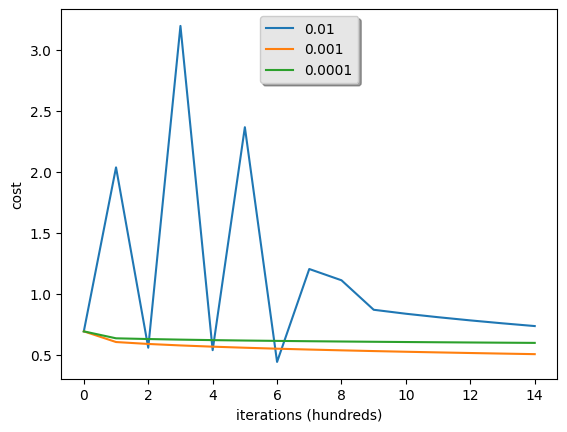

In [38]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iter = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()